In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

## K-means

The *k*-means algorithm aims to find *k* clusters within a dataset, where the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Now let's play with a toy dataset.

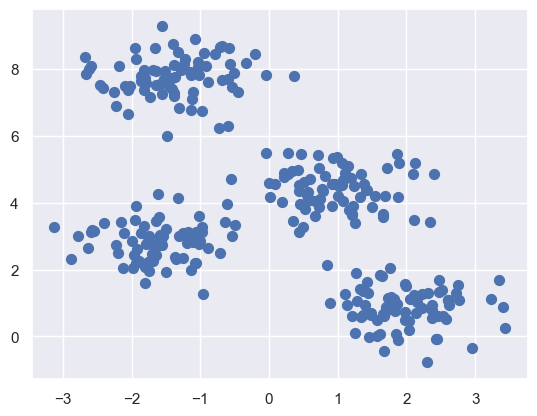

In [3]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Let's try to use *k*-means in Scikit-Learn:

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Let's visualize the results by plotting the data colored by these labels.
We will also plot the cluster centers as determined by the *k*-means estimator:

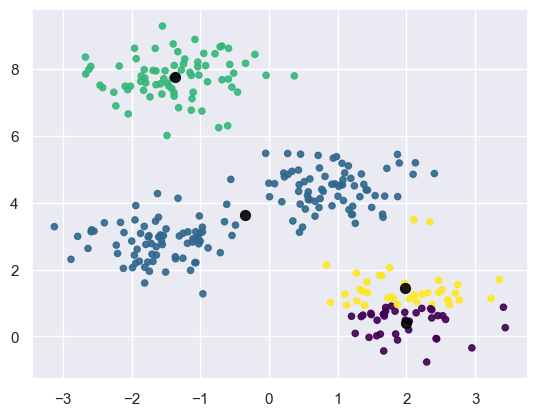

In [5]:
## Todo, you are expected to plot the following image

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=20, alpha=.9)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.9)  # Marking cluster centers
plt.show()

## k-Means Algorithm: Expectation–Maximization

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts for machine learning and data science. In short, the expectation–maximization approach in *k*-means consists of the following procedure:
1. Guess some cluster centers
2. Repeat until converged
   1. *E-Step*: assign points to the nearest cluster center
   2. *M-Step*: set the cluster centers to the mean 

Now let's implement *k*-means algorithm manually:

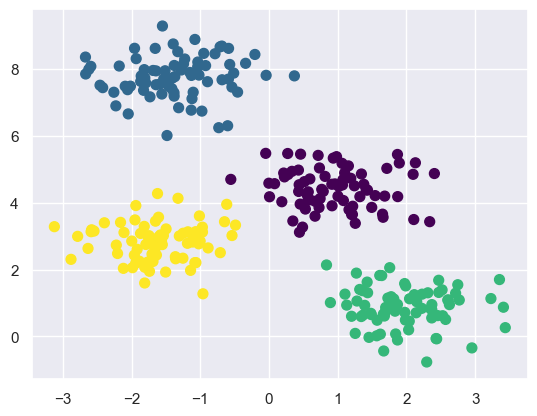

In [6]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        ##Todo
        labels = pairwise_distances_argmin(X, centers);
        
        # 2b. Find new centers from means of points
        ##Todo

        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### K-medians

Now please implement *k*-medians mannually,which is similar to *k*-means.

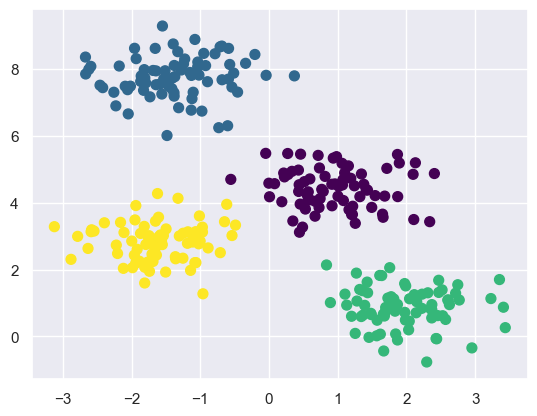

In [7]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center defined by Manhattan Distance (L1-norm)
        ##Todo

        labels = pairwise_distances_argmin(X, centers, metric='manhattan')

        # 2b. Find new centers from medians of points
        ##Todo
        
        new_centers = np.array([np.median(X[labels == i], axis=0) for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### k-means to learn the features

We will start by loading the digits and then finding the  clusters.
The digits consist of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image:

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

The clustering can be performed as we did before:

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
##Todo: to show the shape of cluster centers obtained from kmeans
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_
print("Shape of cluster centers: ", cluster_centers)

Shape of cluster centers:  [[ 0.89775784  4.82585297]
 [ 2.35126113  1.19141129]
 [-1.91550086  7.63219028]
 [-2.28271896  3.10721787]
 [-1.13442103  3.15432356]
 [ 1.68109524  0.54468542]
 [-1.02894269  8.34148306]
 [-1.63741757  2.25373059]
 [-0.82695311  7.12513513]
 [ 1.01767691  3.78840651]]


The result is 10 clusters in 64 dimensions.
Notice that the cluster centers themselves are 64-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster.
Let's see what these cluster centers look like:

ValueError: cannot reshape array of size 2 into shape (8,8)

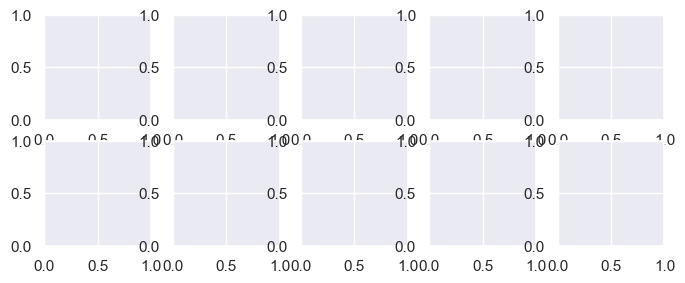

In [11]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
##Todo: to reshape each center to 8*8 for visualization
for center in centers:
    center = center.reshape(8,8)

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)